In [25]:
import glob
import geopandas as gpd
import pandas as pd

from matplotlib import pyplot as plt
from shapely import Point


In [23]:
files = glob.glob ('../datasets/DDR/watersheds/*.shp')

dfs = [gpd.read_file(file).to_crs('WGS 84') for file in files]
df = pd.concat(dfs)
display(df)


,ID,river,post,area_fact,area_gis,arror,arror_proc,geometry,Id
0,78138.0,Хопер,Балашов,14300.0,14446.775786,146.775786,1.026404,"POLYGON ((44.85965 52.87847, 44.88029 52.86375...",NaN
0,78135.0,Хопер,Пановка,932.0,1074.738603,142.738603,15.315301,"POLYGON ((44.85965 52.87847, 44.88029 52.86375...",NaN
0,78141.0,Хопер,Поворино,19100.0,19244.942935,144.942935,0.758864,"POLYGON ((44.85965 52.87847, 44.88029 52.86375...",NaN
0,NaN,Которосль,Гаврилов Ям,4980.0,4882.623193,-97.376807,-1.955358,"MULTIPOLYGON (((40.37984 57.13152, 40.38100 57...",75225.0
0,78054.0,Сосна,Елец,16300.0,16319.018221,19.018221,0.116676,"POLYGON ((38.69035 52.54832, 38.66514 52.52569...",NaN


[False, False, False, False, True]

,ID,river,post,area_fact,area_gis,arror,arror_proc,geometry,Id
0,78054.0,Сосна,Елец,16300.0,16319.018221,19.018221,0.116676,"POLYGON ((38.69035 52.54832, 38.66514 52.52569...",NaN


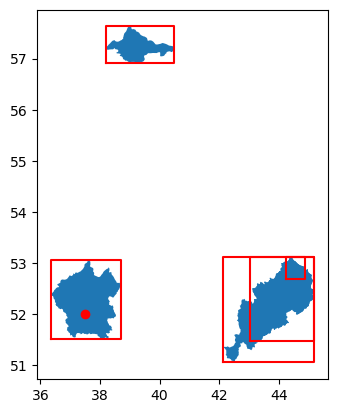

In [30]:
p = Point(37.5, 52)

ax = df.plot ()
plt.plot(p.x, p.y, 'or')
for poly in df['geometry']:
    bd = poly.bounds
    plt.plot([bd[0], bd[0], bd[2], bd[2], bd[0]], [bd[1], bd[3], bd[3], bd[1], bd[1]], '-r')

p_inside = [poly.contains(p) for poly in df['geometry']]

display(p_inside)
df[p_inside]